In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Decorador de tiempo para calcular tiempo de ejecución
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time() * 10 ** 12
        result = func(*args, **kwargs)
        t2 = time.time() * 10 ** 12
        return result, t2 - t1

    return wrap_func

In [4]:
def SuffixArray(search, M, suffix):
	len = 0
	suffix[0] = 0
	i = 1

	while i < M:
		if search[i] == search[len]:
			len += 1
			suffix[i] = len
			i += 1
		else:
			if len != 0:
				len = suffix[len - 1]
			else:
				suffix[i] = 0
				i += 1

In [5]:
@timer_func
def KMPSearch(search, txt):
	M = len(search)
	j = 0  # index for search
	index = []


	N = len(txt)
	i = 0  # index for txt

	suffix = [0]*M

	#Creates the comparison array
	SuffixArray(search, M, suffix)


	while (N - i) >= (M - j):
		if search[j] == txt[i]:
			i += 1
			j += 1

		if j == M:
			index.append(i - j)
			# print("Found pattern at " + str(i-j))
			j = suffix[j-1]

		# mismatch after j matches
		elif i < N and search[j] != txt[i]:
			if j != 0:
				j = suffix[j-1]
			else:
				i += 1
	print("Word found at: ",index)

In [6]:
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

In [7]:
with open('huge_txt_example.txt', 'r') as file:
    document = file.read()
#data to lowercase
document = document.lower()

In [8]:
Search  = KMPSearch("dui", document)
Search


Word found at:  [729, 852, 1001, 4814, 6019, 7251, 7387, 7773, 7846, 8517, 8836, 8990, 9947, 10924, 11038, 11483, 11537, 12442, 13515, 14379, 14886, 16268, 17063, 17081, 17533, 18937, 19419, 19984, 20211, 20372, 20494, 22005, 22016, 23047, 23211, 23461, 23564, 23753, 24666, 24742, 25079, 25105, 25228, 25704, 26482, 29154, 29706, 29740, 29817, 29862, 30103, 31536, 31777, 32422, 32516, 34820, 35138, 35614, 36199, 36528, 37093, 37711, 38604, 39299, 39646, 39769, 40001, 40506, 41051, 43255, 43987, 44394, 44703, 46043, 46601, 47427, 47821, 48168, 48783, 49123, 49424, 50160, 50548, 51137, 52178, 52924, 53045, 55007, 55350, 56031, 56938, 58351, 58704, 58926, 60174, 60248, 60449, 60578, 61514, 61628, 62069, 62169, 62977, 63192, 63314, 64719, 64994, 67692, 68106, 70061, 70228, 70307, 70746, 71551, 72048, 72371, 72737, 73332, 73708, 74321, 75492, 77204, 77487, 78179, 78784, 79260, 80863, 82641, 82734, 82806, 83242, 87254, 87662, 89193, 89549, 89558, 91278, 92865, 93715, 94693, 95411, 95473, 9561

(None, 267530272768.0)

In [9]:
runtimeSearch = []
for i in wordSearchList:
	search = KMPSearch(i,document)
	runtimeSearch.append(search[1])

Word found at:  [729, 852, 1001, 4814, 6019, 7251, 7387, 7773, 7846, 8517, 8836, 8990, 9947, 10924, 11038, 11483, 11537, 12442, 13515, 14379, 14886, 16268, 17063, 17081, 17533, 18937, 19419, 19984, 20211, 20372, 20494, 22005, 22016, 23047, 23211, 23461, 23564, 23753, 24666, 24742, 25079, 25105, 25228, 25704, 26482, 29154, 29706, 29740, 29817, 29862, 30103, 31536, 31777, 32422, 32516, 34820, 35138, 35614, 36199, 36528, 37093, 37711, 38604, 39299, 39646, 39769, 40001, 40506, 41051, 43255, 43987, 44394, 44703, 46043, 46601, 47427, 47821, 48168, 48783, 49123, 49424, 50160, 50548, 51137, 52178, 52924, 53045, 55007, 55350, 56031, 56938, 58351, 58704, 58926, 60174, 60248, 60449, 60578, 61514, 61628, 62069, 62169, 62977, 63192, 63314, 64719, 64994, 67692, 68106, 70061, 70228, 70307, 70746, 71551, 72048, 72371, 72737, 73332, 73708, 74321, 75492, 77204, 77487, 78179, 78784, 79260, 80863, 82641, 82734, 82806, 83242, 87254, 87662, 89193, 89549, 89558, 91278, 92865, 93715, 94693, 95411, 95473, 9561

In [10]:
print(runtimeSearch)

[265952165888.0, 474988675072.0, 272251486208.0, 282323582976.0, 271020720128.0, 283323924480.0, 281250365440.0, 282037321728.0, 267518476288.0, 281921191936.0, 281249841152.0, 281251151872.0, 267646402560.0, 281249841152.0, 282008748032.0, 281914900480.0, 265623961600.0, 282006388736.0, 283345158144.0, 267517689856.0, 281250889728.0, 271607922688.0, 266454171648.0, 281357058048.0, 282039681024.0, 266379722752.0, 281249579008.0, 266510532608.0, 282034438144.0, 265945350144.0, 285688201216.0, 266334371840.0, 281248792576.0, 267921129472.0, 281249841152.0, 283438743552.0, 298971561984.0, 312498454528.0, 283799977984.0, 283163754496.0, 313277546496.0, 281250627584.0, 267729764352.0, 313159319552.0, 267639586816.0, 281340280832.0, 267775115264.0, 282079264768.0, 304116924416.0, 296873623552.0, 297694396416.0, 331725406208.0, 281974931456.0, 276434255872.0, 266365042688.0, 283476230144.0, 281250889728.0, 282062749696.0, 282137985024.0, 281250103296.0, 267919556608.0, 299125702656.0, 3377072

In [11]:
df = pd.DataFrame(zip(runtimeSearch))
df.columns = [ 'Runtime KMP Search']
df

,Runtime KMP Search
0,2.659522e+11
1,4.749887e+11
2,2.722515e+11
3,2.823236e+11
4,2.710207e+11
...,...
71,2.721744e+11
72,2.830240e+11
73,2.663289e+11
74,2.850431e+11


<AxesSubplot: title={'center': 'Runtime KMP'}>

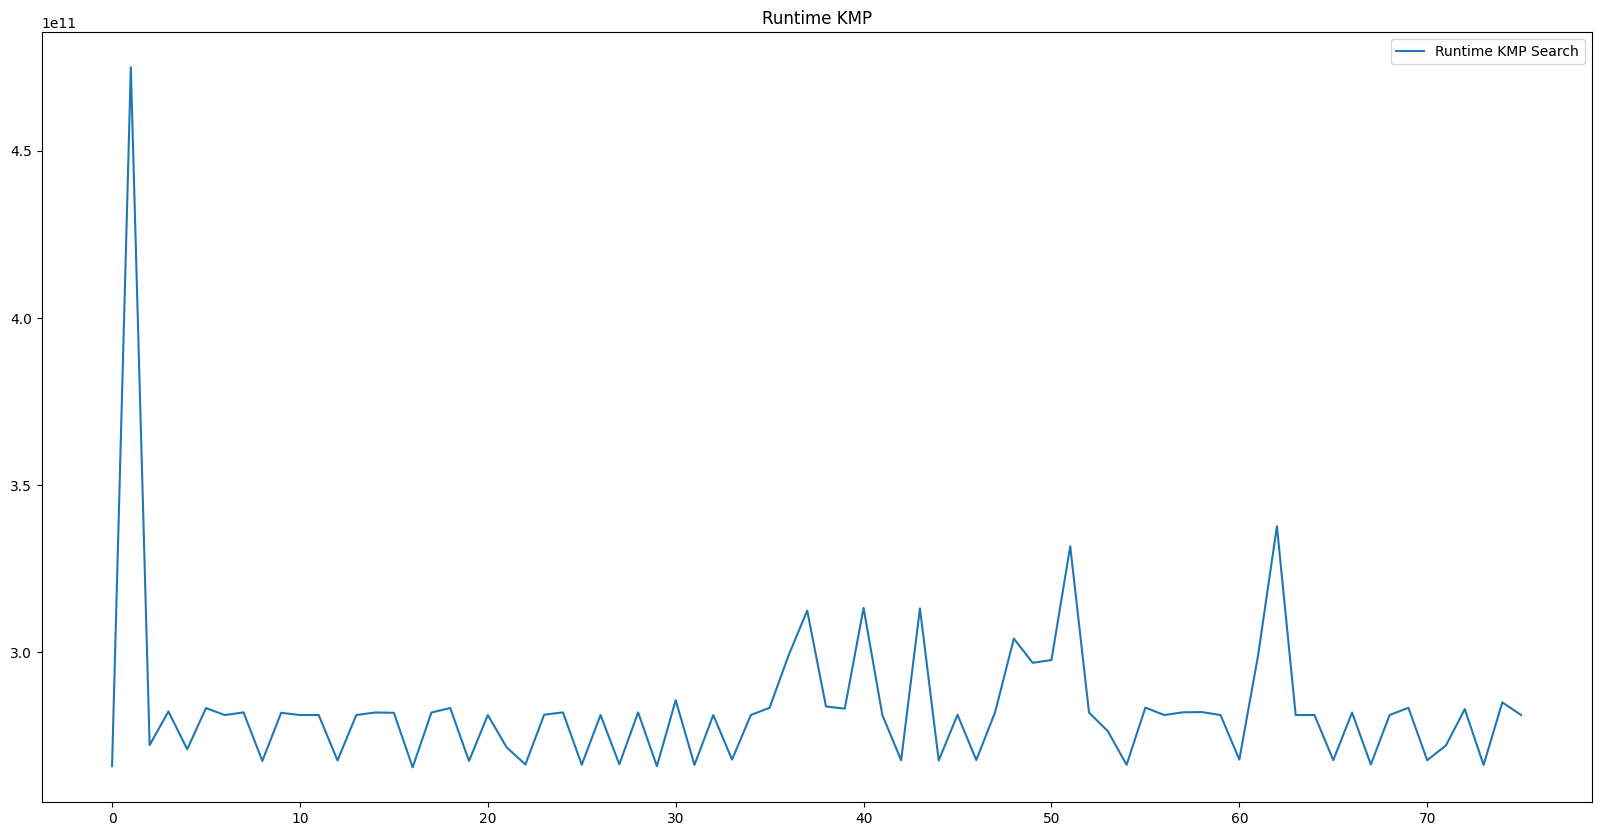

In [12]:
df.plot(y= "Runtime KMP Search", figsize=(20,10), title="Runtime KMP")
